In [2]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
data=datasets.make_regression(n_samples=10000,n_features=1,noise=10)
X,y=data
st=StandardScaler()
x=st.fit_transform(X)
y=st.fit_transform(y.reshape(-1,1))

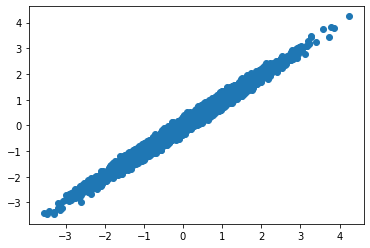

In [5]:
plt.scatter(X,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)


In [9]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
y_pred=model.predict(x_test)

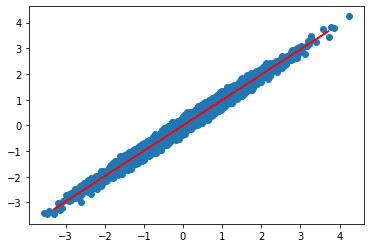

In [11]:
plt.scatter(X,y)
plt.plot(x_test,y_pred,color="red")

In [12]:
def mse(y_pred,y):
    return np.mean((y-y_pred)**2,axis=0)
print(mse(y_test,y_pred))

[0.01471794]


## RANCAS

In [13]:
from sklearn.linear_model import RANSACRegressor

In [14]:
model=RANSACRegressor()
model.fit(x_train,y_train)

RANSACRegressor()

[0.01471794]


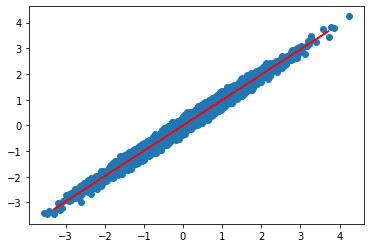

In [15]:
y_pred=model.predict(x_test)
plt.scatter(X,y)
plt.plot(x_test,y_pred,color="red")
print(mse(y_test,y_pred))

## Support Vector machine (SVM) Regression 

In [16]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train.ravel())

SVR()

[2.36117589 3.53633629 1.02120483 ... 1.288379   2.79542964 1.2646181 ]


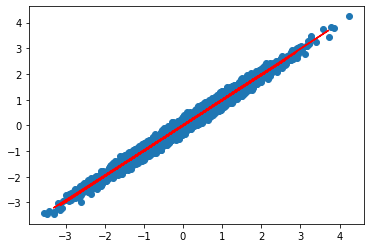

In [17]:
y_pred=svr.predict(x_test)
plt.scatter(X,y)
plt.plot(x_test,y_pred,color="red")
print(mse(y_test,y_pred))

## Real Applications 

## Predict Diabets

In [18]:
from sklearn.datasets import load_diabetes
import pandas as pd 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [19]:
df=load_diabetes(as_frame=True)
df=pd.DataFrame.from_dict(df['frame'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [19]:
import seaborn as sns

C:\Users\alibidaran\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


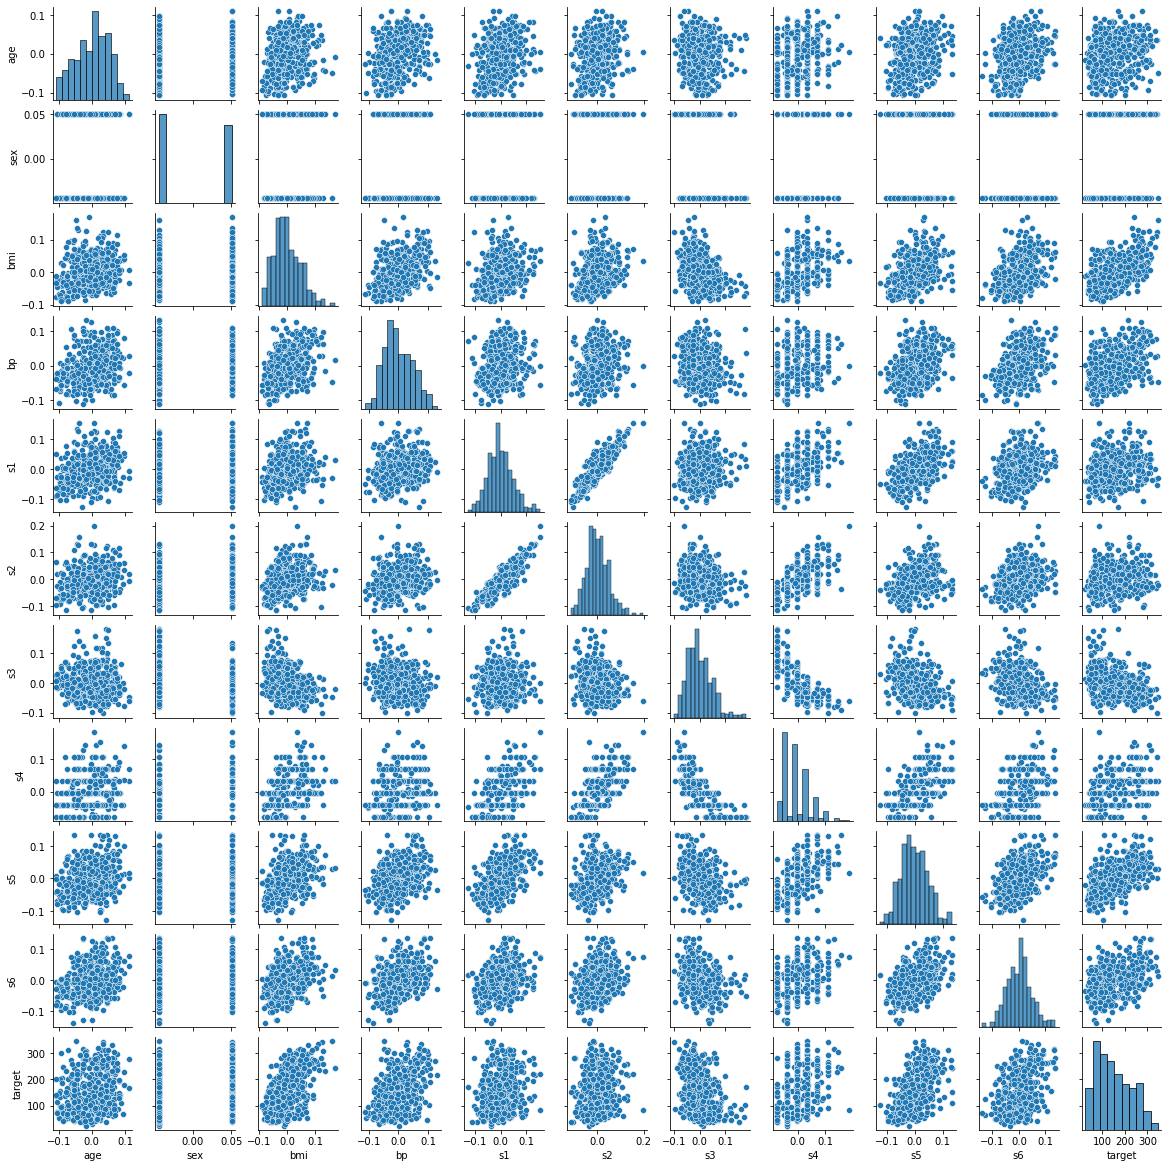

In [20]:
sns.pairplot(df,size=1.5)
plt.show()

In [21]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [29]:
cols=df.columns.tolist()
cols

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [38]:
X=df[["age","bmi","bp","s4","s5"]].values
Y=df["target"].values.reshape(-1,1)

In [22]:
minmax=MinMaxScaler()
x=minmax.fit_transform(X)


In [39]:
x=X
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.05,random_state=42)


In [40]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test.flatten(),y_pred.flatten()))
print(r2_score(y_test,y_pred))


3281.9604157969343
0.5485853330658947


In [41]:
print("predcition",y_pred.flatten())
print("True",y_test.flatten())

predcition [159.51011019 162.67304803 181.88593511 259.80229472 138.68291374
 118.66241636 278.16800898 223.34746648  94.69932376 143.01268656
 112.15699146 129.13660607  59.88742555 201.62265062 105.92721383
 129.99575906 232.48090852 242.43665538 170.84997789 217.97065533
 199.44346679  96.25838857  78.44351434]
True [219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128.]


In [42]:
model=SVR(degree=3,coef0=0.001)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

5904.38796974538
0.18788559545586514


C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Using Pipeline

In [28]:
from sklearn import pipeline

In [34]:
pipe=pipeline.make_pipeline(StandardScaler(),
                      SVR(kernel="rbf"))
pipe.fit(x_train,y_train)
print(pipe.score(x_test,y_test))
print(pipe.predict(x_test))

0.1069420040670589
[142.84911468 150.59624768 131.26736328 157.99768399 140.87917847
 120.04811885 154.43179482 171.57025409 120.70360242 138.72848876
 111.39040939 115.03043389 112.34014368 167.14235603 111.399107
 127.64818738 170.52469307 171.59346466 157.01050056 177.99875719
 144.73848693 115.35719357 106.33241511]


C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Make Grid search

In [36]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
grid=GridSearchCV(SVR(),tuned_parameters)
grid.fit(x_train,y_train)

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [40]:
print(grid.cv_results_)

{'mean_fit_time': array([0.00538464, 0.00534291, 0.0039988 , 0.00399919, 0.00419941,
       0.0037982 , 0.00660243, 0.00420299, 0.00259991, 0.0027997 ,
       0.00299902, 0.00499811]), 'std_fit_time': array([4.91308869e-04, 7.64744581e-04, 2.33601546e-07, 6.46813391e-07,
       4.01071149e-04, 4.00281247e-04, 4.86413206e-04, 4.06790408e-04,
       4.90232857e-04, 4.00400801e-04, 1.12234137e-06, 6.31203606e-04]), 'mean_score_time': array([0.00121675, 0.00161743, 0.0008008 , 0.00100112, 0.00080037,
       0.00040011, 0.00139761, 0.00099716, 0.00039992, 0.00040035,
       0.00020022, 0.00160084]), 'std_score_time': array([4.11684302e-04, 1.23310106e-03, 4.00400176e-04, 3.69356475e-07,
       4.00185738e-04, 8.00228119e-04, 4.91867248e-04, 6.55126362e-06,
       4.89804093e-04, 4.90329667e-04, 4.00447845e-04, 1.74201183e-03]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
             mask=[False, False, False, False, False, False, False, False,
     

In [43]:
best_model=grid.best_estimator_
best_pred=best_model.predict(x_test)
print(best_pred)
print(y_test)

[150.64985977 172.45274613 141.0154849  268.56001516 145.91392544
 120.38314909 293.19457645 204.01955988  59.49255194 152.50017415
 107.86613904  97.20011874  68.20461584 197.73934131  94.52815064
 138.32290048 217.47583708 267.83700963 182.70457173 233.02740014
 164.37093446  95.76640474  85.35988775]
[[219.]
 [ 70.]
 [202.]
 [230.]
 [111.]
 [ 84.]
 [242.]
 [272.]
 [ 94.]
 [ 96.]
 [ 94.]
 [252.]
 [ 99.]
 [297.]
 [135.]
 [ 67.]
 [295.]
 [264.]
 [170.]
 [275.]
 [310.]
 [ 64.]
 [128.]]


## Housing

In [191]:
from sklearn.datasets import fetch_california_housing
import pandas as pd 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [192]:
df=fetch_california_housing(as_frame=True)
df=pd.DataFrame.from_dict(df['frame'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [194]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [217]:
x=df[["MedInc","HouseAge","AveRooms","Latitude","Longitude"]].values
y=df["MedHouseVal"].values.reshape(-1,1)
print(y.shape)

(20640, 1)


In [218]:
minmax=MinMaxScaler()
x=minmax.fit_transform(x)
print(x.shape)

(20640, 5)


In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [220]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test.flatten(),y_pred.flatten()))
print(r2_score(y_test,y_pred))

0.5485707128789087
0.5813744243302476


In [223]:
print("prediction",y_pred)
print("Real",y_test)

prediction [[0.73783086]
 [1.75094085]
 [2.46514382]
 ...
 [4.4418073 ]
 [1.30031765]
 [1.89637434]]
Real [[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [5.00001]
 [0.723  ]
 [1.515  ]]


In [229]:
model=SVR(degree=3,coef0=0.001)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.47094090402026356
0.6406153255661776


In [230]:
print("prediction",y_pred)
print("Real",y_test)

prediction [0.65878605 1.34558843 2.63895879 ... 4.72501025 0.64178267 1.8344053 ]
Real [[0.477  ]
 [0.458  ]
 [5.00001]
 ...
 [5.00001]
 [0.723  ]
 [1.515  ]]
